**Review**

Hello Brandon!

I'm happy to review your project today.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did an excellent job! The project is accepted. Keep up the good work on the next sprint!

# Project description

You work for the OilyGiant mining company. Your task is to find the best place for a new well.

Steps to choose the location: 

- Collect the oil well parameters in the selected region: oil quality and volume of reserves;

- Build a model for predicting the volume of reserves in the new wells; 

- Pick the oil wells with the highest estimated values; 

- Pick the region with the highest total profit for the selected oil wells. 

You have data on oil samples from three regions. Parameters of each oil well in the region are already known. Build a model that will help to pick the region with the highest profit margin. Analyze potential profit and risks using the Bootstrapping technique.

# Developing a model to find the best place for a new well

**Goal**

Find the region with highest profit margin.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Download and prepare the data. Explain the procedure.

In [2]:
path = r'/datasets'
datasets = ['geo_data_0.csv', 'geo_data_1.csv', 'geo_data_2.csv']

In [3]:
df1 = pd.read_csv("/datasets/geo_data_0.csv")
df2 = pd.read_csv("/datasets/geo_data_1.csv")
df3 = pd.read_csv("/datasets/geo_data_2.csv")

In [4]:
df = pd.DataFrame()
for i, dataset in enumerate(datasets):
    temp = pd.read_csv(os.path.join(path, dataset))
    temp['region'] = f'region{i+1}'
    df = pd.concat([df, temp], axis=0)

In [5]:
df.head()

,id,f0,f1,f2,product,region
0,txEyH,0.705745,-0.497823,1.221170,105.280062,region1
1,2acmU,1.334711,-0.340164,4.365080,73.037750,region1
2,409Wp,1.022732,0.151990,1.419926,85.265647,region1
3,iJLyR,-0.032172,0.139033,2.978566,168.620776,region1
4,Xdl7t,1.988431,0.155413,4.751769,154.036647,region1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       300000 non-null  object 
 1   f0       300000 non-null  float64
 2   f1       300000 non-null  float64
 3   f2       300000 non-null  float64
 4   product  300000 non-null  float64
 5   region   300000 non-null  object 
dtypes: float64(4), object(2)
memory usage: 16.0+ MB


In [7]:
df.duplicated().sum()

0

In [8]:
df['id'].duplicated().sum()

49

In [9]:
# Total number of duplicatde in each region 
df[df['id'].duplicated()].groupby('region').size()

region
region1    10
region2    14
region3    25
dtype: int64

In [10]:
# Dropping duplicated
df = df.drop_duplicates(subset='id')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299951 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       299951 non-null  object 
 1   f0       299951 non-null  float64
 2   f1       299951 non-null  float64
 3   f2       299951 non-null  float64
 4   product  299951 non-null  float64
 5   region   299951 non-null  object 
dtypes: float64(4), object(2)
memory usage: 16.0+ MB


In [12]:
df.describe()

,f0,f1,f2,product
count,299951.000000,299951.000000,299951.000000,299951.000000
mean,0.547844,-1.516308,2.497415,85.439359
std,5.316665,3.900250,2.916480,46.519744
min,-31.609576,-26.358598,-12.088328,0.000000
25%,-1.003028,-2.479142,0.648209,52.664541
50%,0.347960,-0.229675,2.491200,84.038886
75%,1.755369,0.678479,4.344939,124.170819
max,29.421755,18.734063,16.739402,190.029838


In [13]:
output = df.groupby('region').describe()

In [14]:
print(output['f0'])

           count      mean       std        min       25%       50%       75%  \
region                                                                          
region1  99990.0  0.500454  0.871844  -1.408605 -0.072572  0.502405  1.073626   
region2  99986.0  1.140911  8.965934 -31.609576 -6.298867  1.150960  8.620926   
region3  99975.0  0.002109  1.731997  -8.760004 -1.162253  0.009430  1.158571   

               max  
region              
region1   2.362331  
region2  29.421755  
region3   7.238262  


In [15]:
print(output['f1'])

           count      mean       std        min       25%       50%       75%  \
region                                                                          
region1  99990.0  0.250141  0.504430  -0.848218 -0.200877  0.250252  0.700640   
region2  99986.0 -4.796738  5.119797 -26.358598 -8.268102 -4.813327 -1.332883   
region3  99975.0 -0.002231  1.730494  -7.084020 -1.174899 -0.009825  1.163539   

               max  
region              
region1   1.343769  
region2  18.734063  
region3   7.844801  


In [16]:
print(output['f2'])

           count      mean       std        min       25%       50%       75%  \
region                                                                          
region1  99990.0  2.502629  3.248149 -12.088328  0.287784  2.515969  4.715035   
region2  99986.0  2.494430  1.703557  -0.018144  1.000019  2.011468  3.999902   
region3  99975.0  2.495186  3.473532 -11.970335  0.130339  2.484348  4.858822   

               max  
region              
region1  16.003790  
region2   5.019721  
region3  16.739402  


In [17]:
output['product']

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
region1,99990.0,92.499684,44.288304,0.0,56.497069,91.847928,128.563699,185.364347
region2,99986.0,68.822078,45.944140,0.0,26.953261,57.085625,107.813044,137.945408
region3,99975.0,94.997085,44.750945,0.0,59.444354,94.910839,130.587698,190.029838


There are about 300K observations in total, which is equally split across the 3 data sources. Since this is synthetic data, it makes no sense to interpret what each row represents. We can only say that it represent the observation for one oil well.

There are 49 duplicates in total.

The mean and sd for f0 field in region1 and region3 are very tight compared with the same metrics and field in region2. A similar pattern is observed for f1 field. However, in f2, the deviation around the mean is lower for region2 than it is for region1 and region3. It seems to suggest that wells in region1 and region3 are similar; this can also be seen in the product capacity for region1 and region3, where the means appear to be relatively closer to one another than it is for the mean value in region2.

In [18]:
def plot_grouped_histogram(df, key, grp='region', bins=20, title=None, figsize=(9, 7), alpha=0.8):
    
    df.groupby(grp)[key].plot(kind='hist', bins=bins, title=title, figsize=figsize, alpha=alpha, histtype='stepfilled')
    plt.legend()
    plt.show()

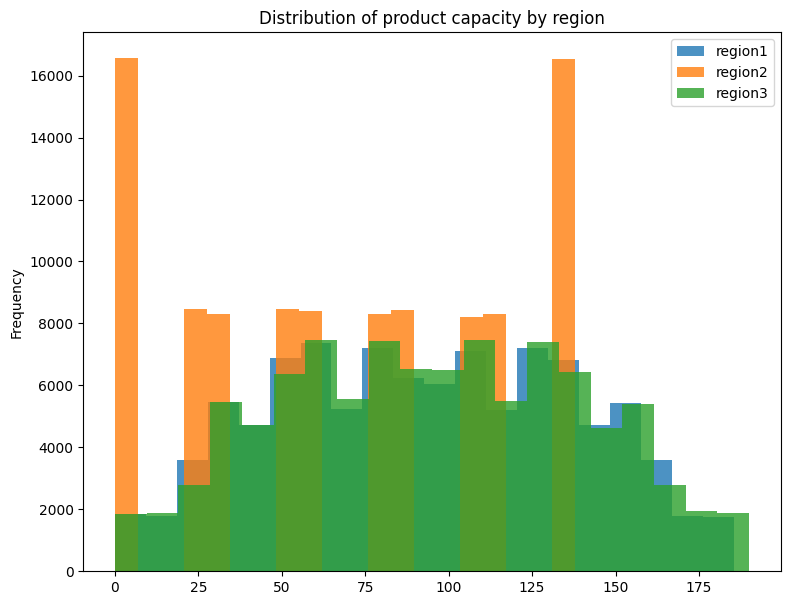

In [19]:
plot_grouped_histogram(df, 'product', grp='region', bins=20, title='Distribution of product capacity by region', figsize=(9, 7), alpha=0.8)

The histogram plot confirms what we've observed above. Region2 has a unique pattern, there are gaps with intervals of around 13K each separating every succeeding observation. In addition, region2 has 2 peaks, first one is at 0 and the other at 138K.

On the other hand, region1 and region3 are quite similar in their distribution.

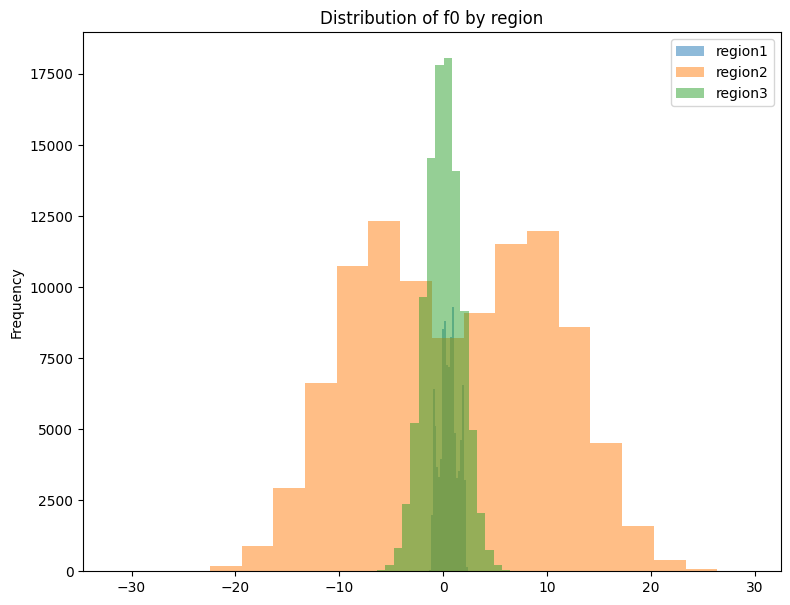

In [20]:
plot_grouped_histogram(df, 'f0', grp='region', bins=20, title='Distribution of f0 by region', figsize=(9, 7), alpha=0.5)

region2 has a 2 peak. region3 and region1 has a very narrow distribution with most of the values close to 0.

region 1, has a smaller peak, and it also has a narrow distribution, peaking close to 0.

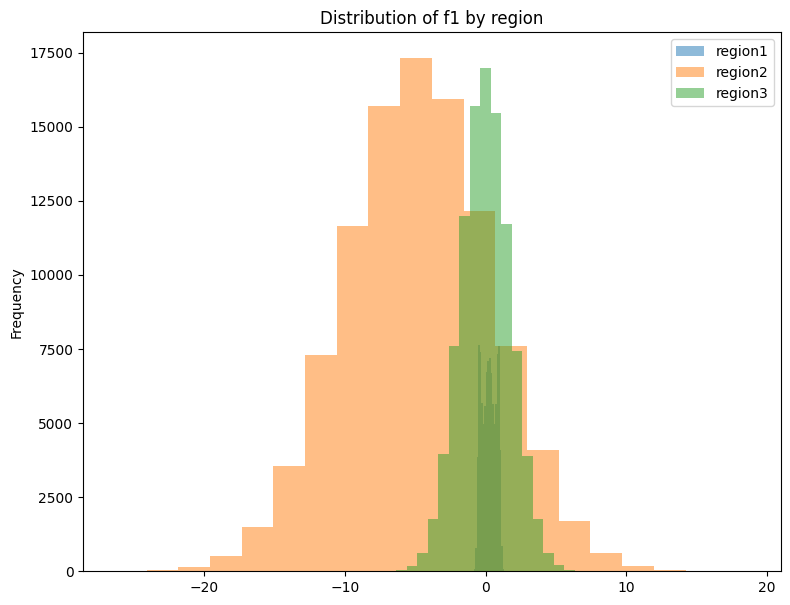

In [21]:
plot_grouped_histogram(df, 'f1', grp='region', bins=20, title='Distribution of f1 by region', figsize=(9, 7), alpha=0.5)

region2 appears to be a normal distribution peaking below 0. region1 and region3 share a similar shaped distribution except for their heights, region3 has taller peak than region1, and is relatively wider than region1.

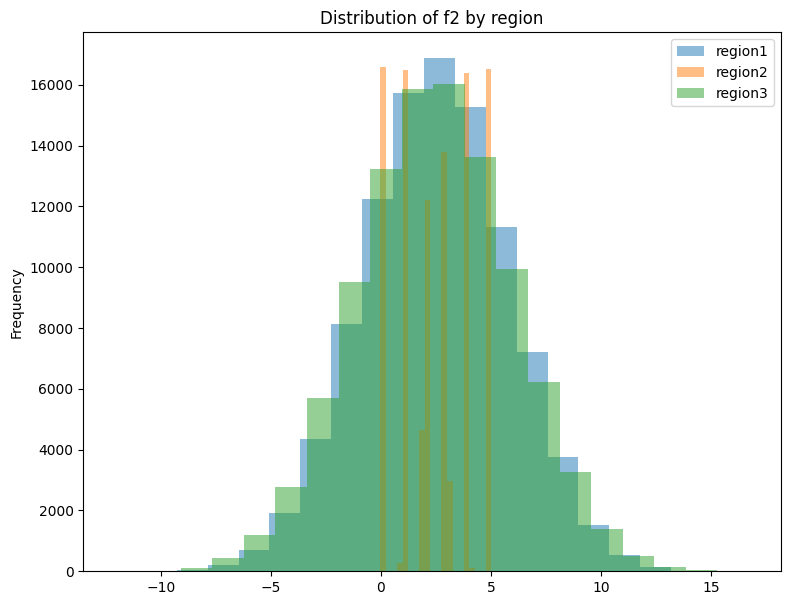

In [22]:
plot_grouped_histogram(df, 'f2', grp='region', bins=20, title='Distribution of f2 by region', figsize=(9, 7), alpha=0.5)

region1 and region3 are almost identical, and appear to be normally distributed. However, region2 appears to have gaps between observations; this is similar to what we have seen for product.

Overall, The plots for f0, f1 and f2 reveal that region1 and region3 share similar characteristics unlike region2 which appears to have different characteristics.

The numbers appear to be normalized, so there is no need to scale them.

<AxesSubplot:>

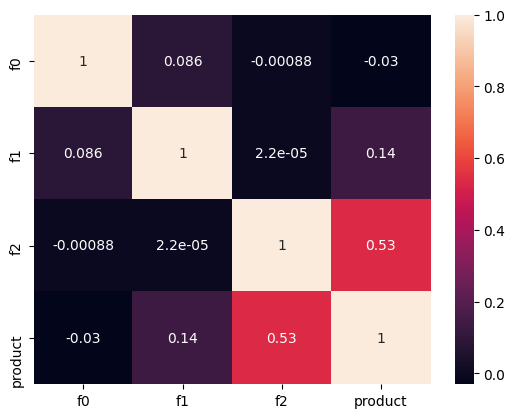

In [23]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:ylabel='region-None'>

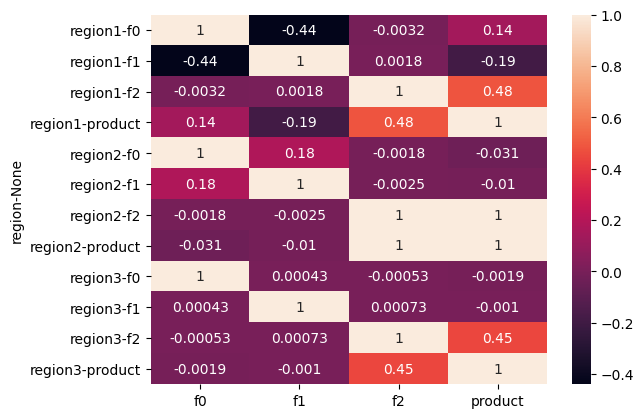

In [24]:
sns.heatmap(df.groupby('region').corr(), annot=True)

Only f2 has a moderately strong correlation with product. However, when split by region, region2's f2 field is strongly positively correlated with product. For region1 and region2, their respective f2 has a similar positive correlation with product.

In region1, f1 has a moderately strong negative correlation with f0. In region2, the correlation strength is slightly positively correlated. However, in region3, there seems to be no relation between f0, f1, and f2.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Great, you loaded the data, explored it a bit and made some interesting observations!

</div>

## Train and test the model for each region

In [25]:
#Train the model and make predictions for the validation set.
def train_and_evaluate(model, X_train, X_val, y_train, y_val):
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    score = r2_score(y_val, y_pred)

    return y_pred, y_val, rmse, score, y_pred.mean(), y_val.mean()

In [26]:
model = LinearRegression()

In [27]:
results = {}
preds, targets = [], []

In [28]:
#Split the data into a training set and validation set at a ratio of 75:25.
for region in df['region'].unique():
    features = df[df['region'] == region].drop(['id', 'product', 'region'], axis=1)
    target = df[df['region'] == region]['product']
    X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.25, random_state=42)
    y_pred, y_val, rmse, score, mean_pred, mean_target = train_and_evaluate(model, X_train, X_val, y_train, y_val)
    results[region] = {
        'rmse': rmse,
        'score': score,
        'mean_pred': mean_pred,
        'mean_target': mean_target
    }
    preds.append(y_pred)
    targets.append(y_val.values)

In [29]:
pd.DataFrame(results)

,region1,region2,region3
rmse,37.685089,0.886764,39.909545
score,0.274539,0.999628,0.205066
mean_pred,92.609840,68.861597,94.744142
mean_target,92.388766,68.865447,94.977154


Comparing to the RMSE values for regions 1 and 3, the RMSE for region 2 indicates that the model fits the synthetic data exceptionally well. This is further supported by the R2 score for region 2, which is 99.9%. This high R2 score means that 99% of the variance in the target variable is explained by the input features in region 2.

<div class="alert alert-success">
<b>Reviewer's comment</b>

The data for each region was split into train and validation sets, the models were trained and evaluated correctly

</div>

## Prepare for profit calculation

In [30]:
revenue_per_barrel = 4.5
revenue_per_1000_barrel = 4500
budget = 100e6
num_oil_wells = 200
cost_per_well = budget / num_oil_wells

In [31]:
cost_per_well

500000.0

In [32]:
cost_per_well / revenue_per_1000_barrel

111.11111111111111

At least 111K barrels of oil should be produced in order to be profitable in the new oil wells.

<div class="alert alert-warning">
<b>Reviewer's comment</b>

That's right! We can note here that none of the regions have an average amount of product greater than the break-even point, which means if we select the wells to develop randomly, we're going to lose money on average. Let's see if using our models can help with selecting better wells and making a profit!

</div>

## Calculate profit from a set of selected oil wells and model predictions

In [33]:
def profit_calculation(target, pred, num_wells=200, budget=100e6, revenue_per_barrel=4.5):
    top_wells_idx = pred.argsort()[::-1]
    total_produced = target[top_wells_idx][:num_wells].sum()
    total_revenue = revenue_per_barrel * total_produced * 1000
    return total_revenue - budget

<div class="alert alert-success">
<b>Reviewer's comment</b>

Profit is calculated correctly!

</div>

In [34]:
for i, (target, pred) in enumerate(zip(targets, preds)):
    print('Profit for region{} is ${:,.0f}'.format(i+1,  profit_calculation(target, pred, num_wells=200, budget=100e6, revenue_per_barrel=4.5)))

Profit for region1 is $34,685,298
Profit for region2 is $24,150,867
Profit for region3 is $25,529,537


Based on this analysis, we would conclude that it would be wise for the investors to build 200 oil wells in region1. However, from the RMSE values, we saw a lot of variability in production, which is around +/-38K barrels from the mean of 92K barrels.

Minimum number of barrels to produce per 200 oil wells is 111K.

<div class="alert alert-warning">
<b>Reviewer's comment</b>

Remember that we only have the budget to make initial measurements (which would allow to use our models) at randomly selected 500 locations. These are the overall top 200 wells which are highly unlikely to all be contained in such a small sample, so it's not very relevant to our study.

</div>

## Calculate risks and profit for each region

In [35]:
def bootstrap_revenue_model(target, pred, sample_size=500, num_wells=200, budget=100e6, revenue_per_barrel=4.5):
    
    profits = []
    
    random_state = np.random.RandomState(42)
    for _ in range(1000):
        target_subsample = pd.Series(target).sample(n=sample_size, random_state=random_state, replace=True)
        profits.append(profit_calculation(target_subsample.values, pred[target_subsample.index], num_wells=num_wells, budget=budget, revenue_per_barrel=revenue_per_barrel))
        
    mean_profit = pd.Series(profits).mean()
    profit_risk_lb = pd.Series(profits).quantile(0.025)
    profit_risk_ub = pd.Series(profits).quantile(0.975)
    losses = sum(pd.Series(profits) < 0) / len(profits)
    return mean_profit, profit_risk_lb, profit_risk_ub, losses

<div class="alert alert-success">
<b>Reviewer's comment</b>

Bootstrapping is done correctly, all needed statistics are calculated!

</div>

In [36]:
ci = []
for i, (target, pred) in enumerate(zip(targets, preds)):
    
    profit, lb, ub, losses = bootstrap_revenue_model(target, pred, sample_size=500, num_wells=200, budget=100e6, revenue_per_barrel=4.5)
    
    print('Mean profit for region{} is ${:,.0f} and profit ranges from ${:,.0f} to ${:,.0f}. Risk of loss is {:.0%}'.format(i+1, profit, lb, ub, losses))
    ci.append((lb/1e6, ub/1e6))

Mean profit for region1 is $4,035,721 and profit ranges from $-1,376,900 to $9,028,483. Risk of loss is 6%
Mean profit for region2 is $4,584,835 and profit ranges from $781,037 to $8,387,299. Risk of loss is 1%
Mean profit for region3 is $3,762,702 and profit ranges from $-1,232,087 to $8,624,029. Risk of loss is 8%


Using bootstraping with 1000 samples, a different picture emerges: region2 on average is more profitable. 

In [37]:
ci_array = []

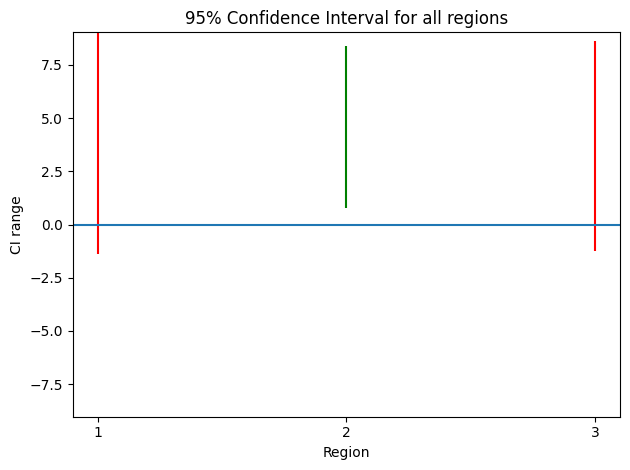

In [38]:
fig, ax = plt.subplots()
for i, (lb, ub) in enumerate(ci):
    ci_array.append([i+1, lb])
    ci_array.append([i+1, ub])
    plt.vlines(x=i+1, ymin=lb, ymax=ub, color= 'r' if lb < 0 else 'g')
plt.xticks(np.arange(1, len(ci)+1))
plt.axhline(0)
plt.title('95% Confidence Interval for all regions')
plt.xlabel('Region')
plt.ylabel('CI range')
plt.ylim([-max(np.array(ci_array)[:, 1]), max(np.array(ci_array)[:, 1])])
plt.tight_layout()
plt.show()

The Confidence Interval doesn't cross the x-axis which implies that the results are statistically significant at the 95% confidence level. The corresponding risk of not making a profit is only 1%.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Yep!

</div>

# Conclusion

The oil executives can invest oil well in region2 with a 95 percent Confindence level rely on investing $100 million on building 200 oil wells.

The risk of loss is 1 percent with a mean profit of about $4.5 million

<div class="alert alert-success">
<b>Reviewer's comment</b>

Region choice is correct and justified, well done!

</div>